# This notebook contains the following:
1. Code for recoding an outlier in the column refuse_tons_per_100000_ppl (which I didn't end up using in the final analysis)
2. Code for converting a pdf of household sign-ups data for the curbside composting program to a csv file

## 1. Recoding an outlier in the column refuse_tons_per_100000_ppl

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('biz_fund_tableau_2.csv')

In [3]:
data.head()

,MONTH,BOROUGH,REFUSETONSCOLLECTED,RESORGANICSTONS,borocd,pop_2010,cd_area_sqmi,refuse_tons_per_100000_ppl,YEAR,MONTHDAYYEAR,MONTHYEAR,dropoff_sites,dropoff_sites_per_sqmi,count_cds_org_month,organics_tons_per_100000_ppl
0,2013 / 05,Staten Island,5987.9,25.6,501,"175,756.00",13.5,"3,406.94",2013,5/15/2013,May 2013,5.0,0.37,1.0,14.57
1,2013 / 05,Staten Island,6889.9,0.0,503,"51,673.00",1.6,"13,333.66",2013,5/15/2013,May 2013,2.0,1.25,0.0,0.00
2,2013 / 05,Queens,5421.5,0.0,405,"169,190.00",7.5,"3,204.39",2013,5/15/2013,May 2013,1.0,0.13,0.0,0.00
3,2013 / 05,Queens,6375.6,0.0,413,"188,593.00",12.6,"3,380.61",2013,5/15/2013,May 2013,4.0,0.32,0.0,0.00
4,2013 / 05,Queens,7580.8,0.0,412,"225,919.00",9.6,"3,355.54",2013,5/15/2013,May 2013,2.0,0.21,0.0,0.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6195 entries, 0 to 6194
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MONTH                         6195 non-null   object 
 1   BOROUGH                       6195 non-null   object 
 2   REFUSETONSCOLLECTED           6195 non-null   float64
 3   RESORGANICSTONS               6195 non-null   float64
 4   borocd                        6195 non-null   int64  
 5   pop_2010                      6195 non-null   object 
 6   cd_area_sqmi                  6195 non-null   float64
 7   refuse_tons_per_100000_ppl    6195 non-null   object 
 8   YEAR                          6195 non-null   int64  
 9   MONTHDAYYEAR                  6195 non-null   object 
 10  MONTHYEAR                     6195 non-null   object 
 11  dropoff_sites                 6195 non-null   float64
 12  dropoff_sites_per_sqmi        6195 non-null   float64
 13  cou

In [7]:
# borocd is int, refuse_tons_per_100000_ppl is obj

test_df = data.loc[data['borocd'] == 502]

In [8]:
test_df['refuse_tons_per_100000_ppl'] = test_df['refuse_tons_per_100000_ppl'].str.replace(',','').astype(float)

<ipython-input-8-e0c7c3655526>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['refuse_tons_per_100000_ppl'] = test_df['refuse_tons_per_100000_ppl'].str.replace(',','').astype(float)


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 27 to 6180
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MONTH                         105 non-null    object 
 1   BOROUGH                       105 non-null    object 
 2   REFUSETONSCOLLECTED           105 non-null    float64
 3   RESORGANICSTONS               105 non-null    float64
 4   borocd                        105 non-null    int64  
 5   pop_2010                      105 non-null    object 
 6   cd_area_sqmi                  105 non-null    float64
 7   refuse_tons_per_100000_ppl    105 non-null    float64
 8   YEAR                          105 non-null    int64  
 9   MONTHDAYYEAR                  105 non-null    object 
 10  MONTHYEAR                     105 non-null    object 
 11  dropoff_sites                 105 non-null    float64
 12  dropoff_sites_per_sqmi        105 non-null    float64
 13  cou

In [11]:
replacement = test_df['refuse_tons_per_100000_ppl'].median()

In [12]:
replacement

3260.61

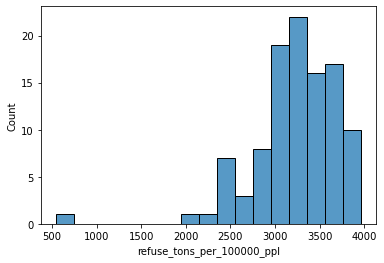

In [14]:
sns.histplot(test_df['refuse_tons_per_100000_ppl'])

In [15]:
data['refuse_tons_per_100000_ppl_rev'] = data['refuse_tons_per_100000_ppl']

In [20]:
data.loc[data['borocd'] == 503, 'refuse_tons_per_100000_ppl_rev'] = '3,368.00'

In [21]:
data.loc[data.borocd == 503]

,MONTH,BOROUGH,REFUSETONSCOLLECTED,RESORGANICSTONS,borocd,pop_2010,cd_area_sqmi,refuse_tons_per_100000_ppl,YEAR,MONTHDAYYEAR,MONTHYEAR,dropoff_sites,dropoff_sites_per_sqmi,count_cds_org_month,organics_tons_per_100000_ppl,refuse_tons_per_100000_ppl_rev
1,2013 / 05,Staten Island,6889.9,0.0,503,"51,673.00",1.6,"13,333.66",2013,5/15/2013,May 2013,2.0,1.25,0.0,0.0,"3,368.00"
106,2013 / 06,Staten Island,6368.5,0.0,503,"51,673.00",1.6,"12,324.62",2013,6/15/2013,Jun 2013,2.0,1.25,0.0,0.0,"3,368.00"
153,2013 / 07,Staten Island,6213.5,0.0,503,"51,673.00",1.6,"12,024.66",2013,7/15/2013,Jul 2013,2.0,1.25,0.0,0.0,"3,368.00"
183,2013 / 08,Staten Island,5736.5,0.0,503,"51,673.00",1.6,"11,101.54",2013,8/15/2013,Aug 2013,2.0,1.25,0.0,0.0,"3,368.00"
253,2013 / 09,Staten Island,5573.7,0.0,503,"51,673.00",1.6,"10,786.48",2013,9/15/2013,Sep 2013,2.0,1.25,0.0,0.0,"3,368.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5920,2021 / 09,Staten Island,6552.4,0.0,503,"51,673.00",1.6,"12,680.51",2021,9/15/2021,Sep 2021,2.0,1.25,0.0,0.0,"3,368.00"
6001,2021 / 10,Staten Island,6304.1,0.0,503,"51,673.00",1.6,"12,199.99",2021,10/15/2021,Oct 2021,2.0,1.25,0.0,0.0,"3,368.00"
6061,2021 / 11,Staten Island,6273.3,0.0,503,"51,673.00",1.6,"12,140.38",2021,11/15/2021,Nov 2021,2.0,1.25,0.0,0.0,"3,368.00"
6093,2021 / 12,Staten Island,5829.6,0.0,503,"51,673.00",1.6,"11,281.71",2021,12/15/2021,Dec 2021,2.0,1.25,0.0,0.0,"3,368.00"


In [22]:
data.to_csv('biz_fund_tableau_3.csv')

## 2. Converting a pdf of household sign-ups data to a csv file

In [3]:
import pdftables_api
  
conversion = pdftables_api.Client('ymopz73v859s')

# Convert into csv
conversion.csv('HouseholdTable_AsOf20220102.pdf', 'HouseholdTable_AsOf20220102.csv')